In [1]:
from trs import *

In [4]:
subset = xr.open_dataset('data/processed/range-coarse-2020-01.nc')

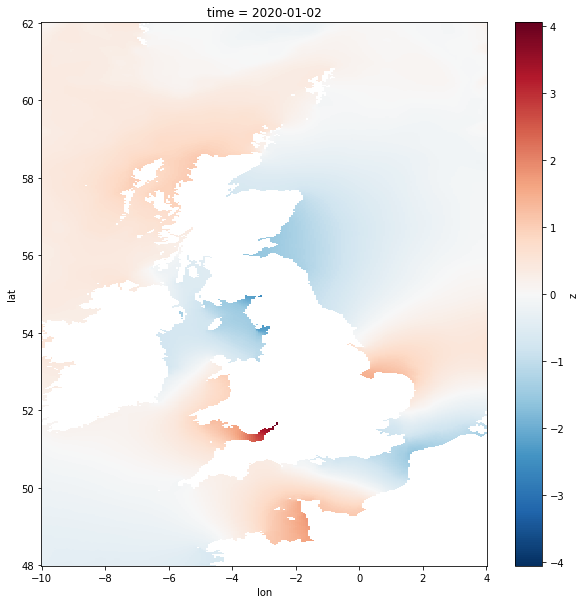

In [5]:
target_time = '2020-01-02T00:00:00.000000000' 
subset.z.sel(time=target_time,method='nearest').plot(size=10,aspect=1)  

In [14]:
start = time()
idx_peaks,idx_troughs,error = peak_trough_idx(subset.z.values,subset.time.values,subset.lat.values,subset.lon.values)
# write_peak_trough(idx_peaks,idx_troughs,subset.lat.values,subset.lon.values,'range-indices-coarse14.nc')
end = time()
print(end-start)

113.08176469802856


In [15]:
error.shape

(2, 587)

In [2]:
idx_peaks_troughs = xr.open_dataset('data/processed/range-indices-coarse14.nc')
high_low = xr.open_dataset('data/processed/range-static-highlowphase.nc')

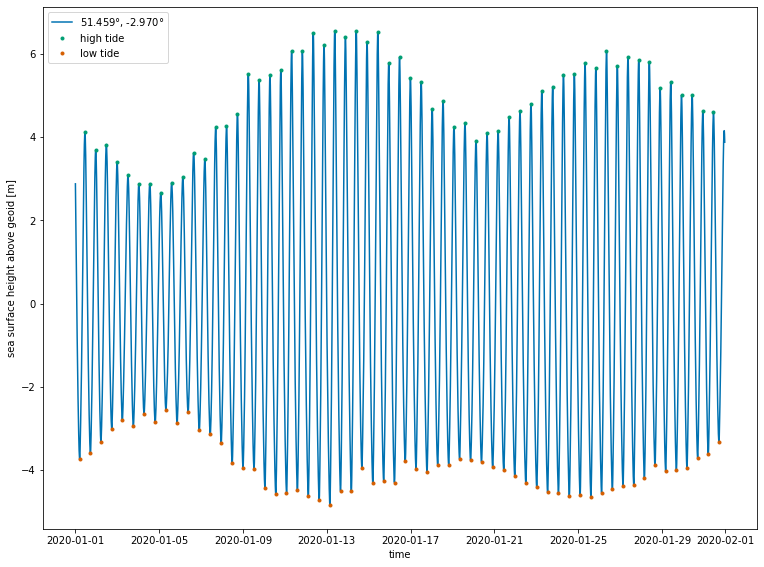

In [11]:
lat = 51.45946
latitude_idx = np.where(subset.lat.values==lat)[0][0]
lon = -2.9696970
longitude_idx = np.where(subset.lon.values==lon)[0][0]

idxp = idx_peaks_troughs.peak.sel(lon=lon,lat=lat,method='nearest').values
idxt = idx_peaks_troughs.trough.sel(lon=lon,lat=lat,method='nearest').values
idxp = idxp[idxp<=len(subset.time.values)].astype('int')
idxt = idxt[idxt<=len(subset.time.values)].astype('int')



plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(subset.time.values,subset.z.values[:,latitude_idx,longitude_idx],label='51.459$\degree$, -2.970$\degree$')
plt.plot(subset.time.values[idxp],subset.z.sel(lon=lon,lat=lat,method='nearest').values[idxp],'.',label='high tide')
plt.plot(subset.time.values[idxt],subset.z.sel(lon=lon,lat=lat,method='nearest').values[idxt],'.',label='low tide')
plt.xlabel('time')
plt.ylabel('sea surface height above geoid [m]')
plt.legend()
# plt.savefig('figures/for-report/turningpoints-severnestuary.png')

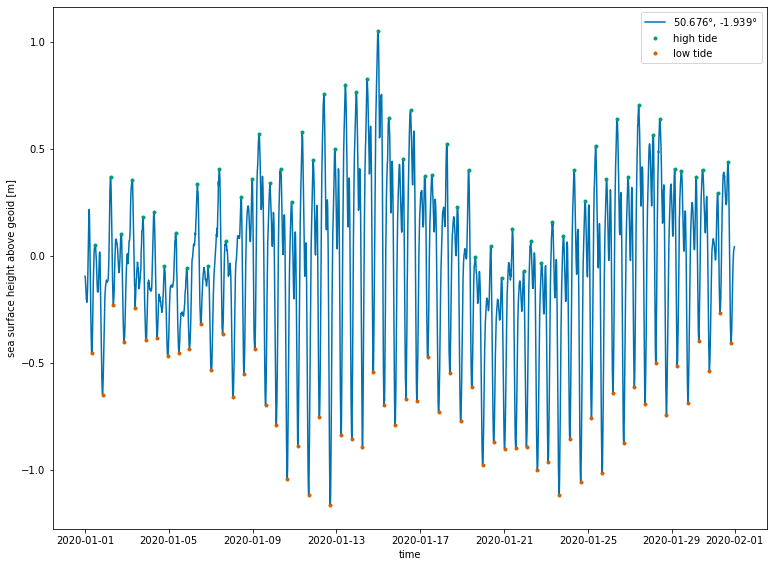

In [14]:
lat = 50.67567
latitude_idx = np.where(subset.lat.values==lat)[0][0]
lon = -1.9393940
longitude_idx = np.where(subset.lon.values==lon)[0][0]

idxp = idx_peaks_troughs.peak.sel(lon=lon,lat=lat,method='nearest').values
idxt = idx_peaks_troughs.trough.sel(lon=lon,lat=lat,method='nearest').values
idxp = idxp[idxp<=len(subset.time.values)].astype('int')
idxt = idxt[idxt<=len(subset.time.values)].astype('int')



plt.figure(figsize=(12.8,9.6))
plt.style.use('seaborn-colorblind')
plt.plot(subset.time.values,subset.z.values[:,latitude_idx,longitude_idx],label='50.676$\degree$, -1.939$\degree$')
plt.plot(subset.time.values[idxp],subset.z.sel(lon=lon,lat=lat,method='nearest').values[idxp],'.',label='high tide')
plt.plot(subset.time.values[idxt],subset.z.sel(lon=lon,lat=lat,method='nearest').values[idxt],'.',label='low tide')
plt.xlabel('time')
plt.ylabel('sea surface height above geoid [m]')
plt.legend()
# plt.savefig('figures/for-report/turningpoints-pooleharbour.png')

[  45   97  142  204  302  344  398  447  496  546  596  642  692  746
  799  846  895  943  994 1043 1087 1142 1191 1240 1285 1340 1389 1440
 1488 1540 1582 1640 1689 1741 1788 1840 1889 1940 1991 2042 2091 2140
 2190 2236 2289 2338 2388 2436 2486 2530 2584 2630 2683 2732 2782 2824
 2879 2923] [  19   67  127  169  274  308  369  418  465  525  569  625  666  719
  764  815  865  914  964 1014 1064 1112 1161 1212 1260 1311 1360 1407
 1458 1506 1562 1611 1657 1707 1757 1808 1856 1909 1966 2012 2060 2110
 2161 2209 2259 2308 2358 2406 2456 2505 2557 2604 2652 2701 2750 2798
 2852 2906 2947]


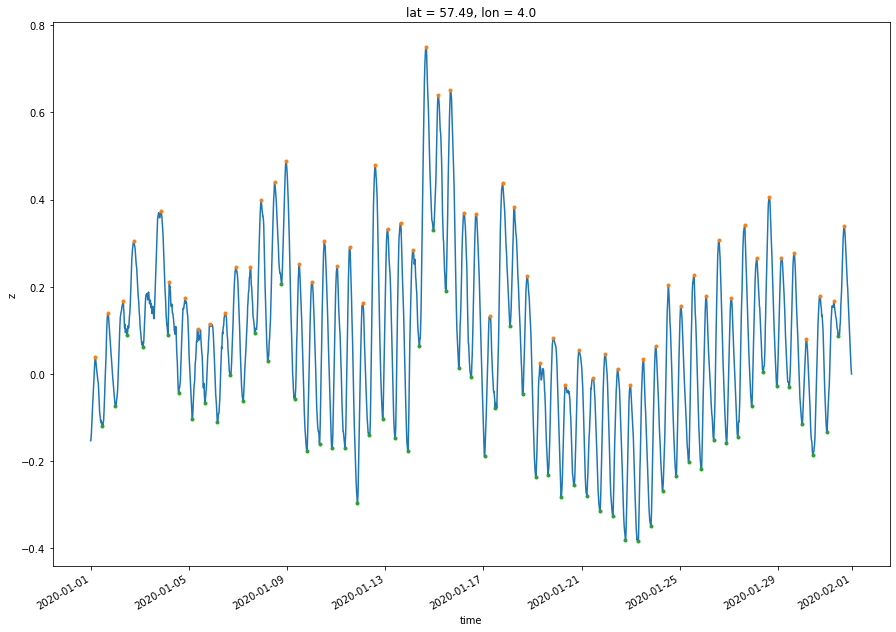

In [8]:
long = 4
lat = 57.5
idxp = idx_peaks_troughs.peak.sel(lon=long,lat=lat,method='nearest').values
idxt = idx_peaks_troughs.trough.sel(lon=long,lat=lat,method='nearest').values
idxp = idxp[idxp<=len(subset.time.values)].astype('int')
idxt = idxt[idxt<=len(subset.time.values)].astype('int')
print(idxt,idxp)


subset.z.sel(lon=long,lat=lat,method='nearest').plot(size=10)
plt.plot(subset.time.values[idxp],subset.z.sel(lon=long,lat=lat,method='nearest').values[idxp],'.')
# plt.plot(subset.time.values[idxt],subset.z.sel(lon=long,lat=lat,method='nearest').values[idxt],'.')

[   7   57  106  156  206  257  305  356  406  456  506  556  606  655
  705  754  804  853  903  952 1002 1051 1101 1149 1199 1248 1299 1348
 1398 1446 1497 1547 1597 1647 1698 1748 1799 1849 1899 1949 1999 2049
 2099 2149 2198 2248 2297 2346 2395 2445 2493 2543 2592 2642 2690 2740
 2788 2838 2887 2937] [  32   82  131  181  230  281  331  382  431  482  531  581  631  680
  730  780  828  878  928  977 1027 1076 1125 1175 1224 1274 1323 1373
 1423 1472 1522 1572 1623 1673 1723 1773 1824 1874 1924 1975 2024 2075
 2124 2174 2223 2273 2322 2371 2420 2470 2519 2568 2617 2666 2715 2764
 2813 2863 2912]


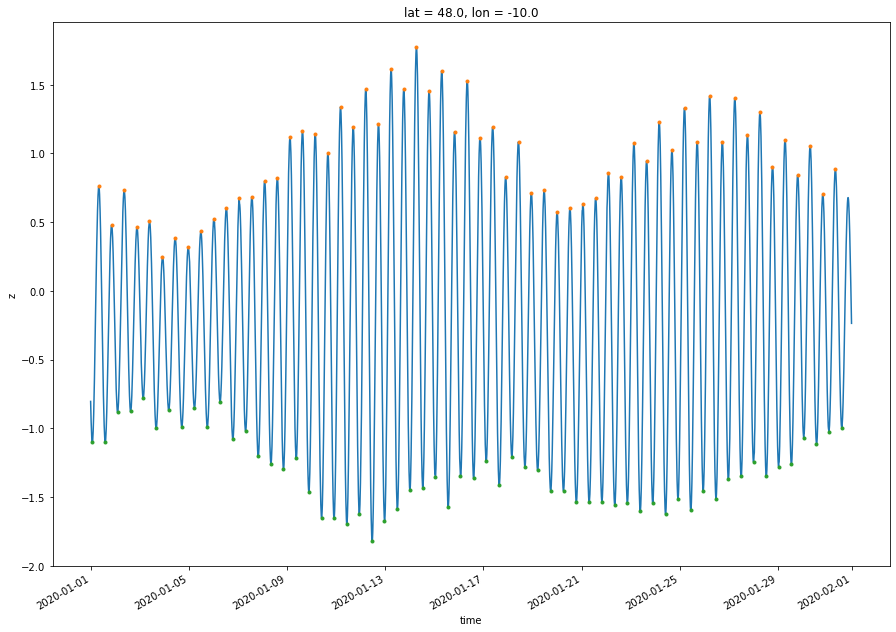

In [9]:
long = subset.lon.values[0]
lat = subset.lat.values[0]
idxp = idx_peaks_troughs.peak.sel(lon=long,lat=lat,method='nearest').values
idxt = idx_peaks_troughs.trough.sel(lon=long,lat=lat,method='nearest').values
idxp = idxp[idxp<=len(subset.time.values)].astype('int')
idxt = idxt[idxt<=len(subset.time.values)].astype('int')
print(idxt,idxp)

subset.z.sel(lon=long,lat=lat,method='nearest').plot(size=10)
plt.plot(subset.time.values[idxp],subset.z.sel(lon=long,lat=lat,method='nearest').values[idxp],'.')
plt.plot(subset.time.values[idxt],subset.z.sel(lon=long,lat=lat,method='nearest').values[idxt],'.')

[  34  134  180  230  333  434  533  636  730  781  829  878  927  979
 1024 1075 1123 1175 1223 1273 1354 1420 1473 1522 1572 1653 1674 1754
 1777 1822 1874 1922 1975 2023 2074 2123 2172 2222 2271 2322 2369 2420
 2468 2518 2566 2618 2697 2717 2795 2815 2861 2912 2963] [   3  101  171  217  268  368  469  602  717  750  791  865  899  948
  999 1047 1097 1145 1197 1233 1311 1393 1443 1493 1531 1611 1658 1710
 1758 1810 1845 1912 1944 1996 2046 2095 2146 2194 2245 2292 2344 2391
 2442 2490 2540 2588 2654 2702 2752 2800 2850 2899 2947 2971]


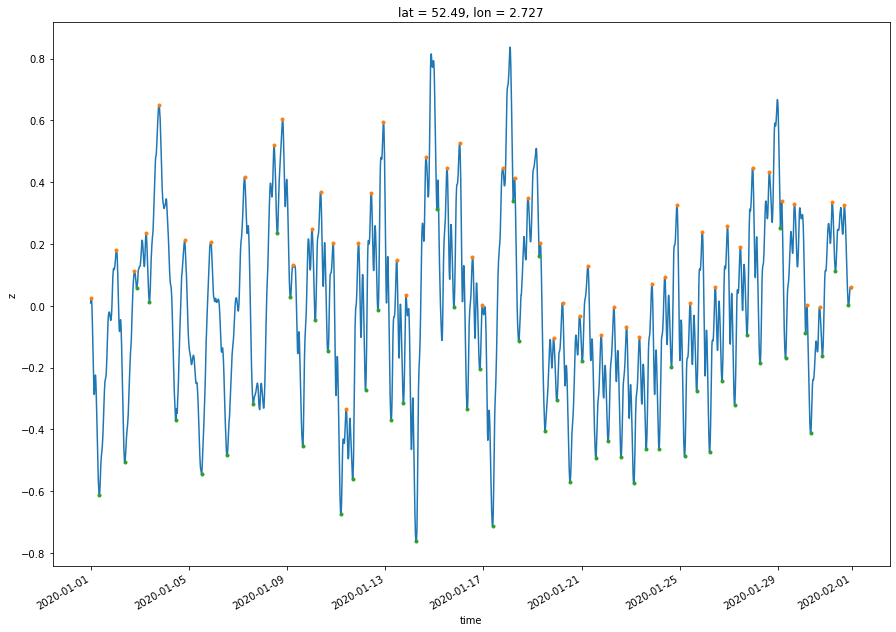

In [10]:
long = subset.lon.values[210]
lat = subset.lat.values[166]
idxp = idx_peaks_troughs.peak.sel(lon=long,lat=lat,method='nearest').values
idxt = idx_peaks_troughs.trough.sel(lon=long,lat=lat,method='nearest').values
idxp = idxp[idxp<=len(subset.time.values)].astype('int')
idxt = idxt[idxt<=len(subset.time.values)].astype('int')
print(idxt,idxp)

subset.z.sel(lon=long,lat=lat,method='nearest').plot(size=10)
plt.plot(subset.time.values[idxp],subset.z.sel(lon=long,lat=lat,method='nearest').values[idxp],'.')
plt.plot(subset.time.values[idxt],subset.z.sel(lon=long,lat=lat,method='nearest').values[idxt],'.')

[  41   92  139  192  239  292  341  391  442  491  541  592  641  690
  740  790  839  888  938  987 1037 1085 1136 1184 1234 1283 1333 1382
 1433 1481 1533 1580 1633 1682 1734 1783 1834 1883 1934 1985 2034 2084
 2134 2183 2232 2283 2331 2381 2429 2480 2527 2578 2626 2676 2724 2775
 2822 2872 2921] [  17   65  116  164  216  264  317  365  417  465  518  564  617  665
  715  763  813  863  912  962 1010 1061 1109 1160 1208 1261 1307 1358
 1407 1456 1505 1559 1606 1657 1706 1758 1808 1859 1908 1959 2009 2058
 2109 2158 2208 2255 2307 2355 2405 2454 2504 2552 2602 2650 2700 2748
 2799 2848 2898 2944]
[-0.526      -0.47100002]


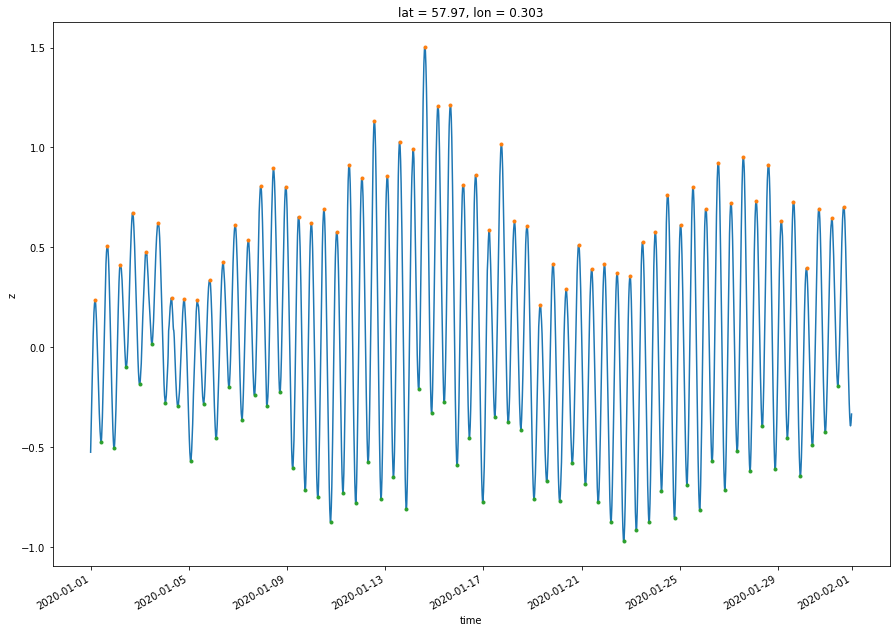

In [11]:
long = subset.lon.values[170]
lat = subset.lat.values[369]
idxp = idx_peaks_troughs.peak.sel(lon=long,lat=lat,method='nearest').values
idxt = idx_peaks_troughs.trough.sel(lon=long,lat=lat,method='nearest').values
idxp = idxp[idxp<=len(subset.time.values)].astype('int')
idxt = idxt[idxt<=len(subset.time.values)].astype('int')
print(idxt,idxp)
print(subset.z.sel(lon=long,lat=lat,method='nearest').values[0:2])

subset.z.sel(lon=long,lat=lat,method='nearest').plot(size=10)
plt.plot(subset.time.values[idxp],subset.z.sel(lon=long,lat=lat,method='nearest').values[idxp],'.')
plt.plot(subset.time.values[idxt],subset.z.sel(lon=long,lat=lat,method='nearest').values[idxt],'.')

[  10   78  158  230  277  356  427  476  560  628  676  726  775  825
  875  924  974 1023 1072 1122 1171 1220 1270 1319 1368 1419 1468 1519
 1567 1618 1669 1719 1770 1820 1871 1920 1971 2021 2071 2120 2170 2219
 2269 2318 2368 2417 2466 2515 2564 2614 2662 2711 2761 2810 2859 2907
 2958] [  44  117  192  239  316  391  440  515  600  642  694  743  795  844
  893  944  993 1044 1092 1143 1191 1241 1291 1340 1389 1438 1488 1535
 1586 1638 1685 1735 1786 1837 1887 1938 1988 2038 2089 2138 2189 2238
 2289 2337 2388 2436 2486 2533 2583 2631 2681 2728 2778 2827 2874 2923
 2972]


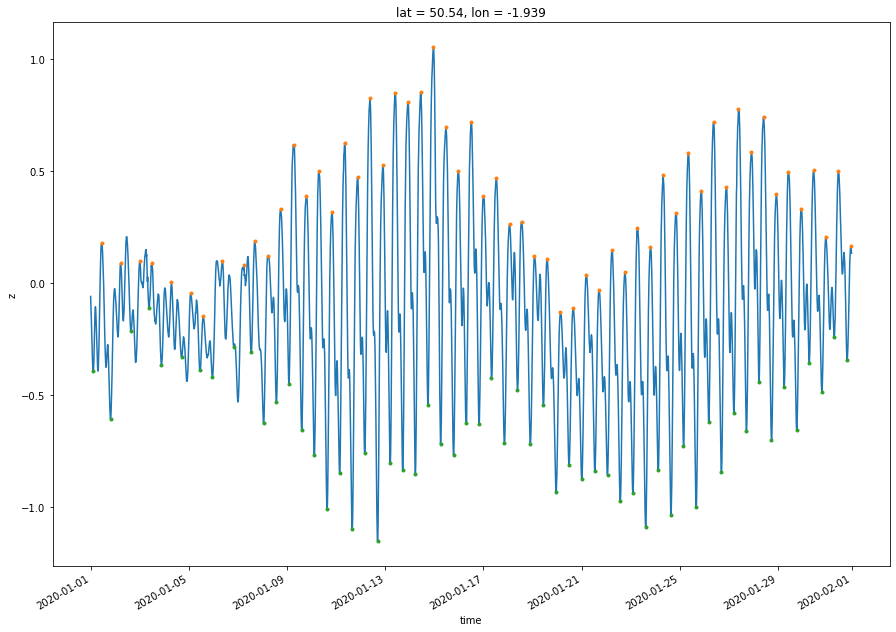

In [12]:
long = subset.lon.values[133]
lat = subset.lat.values[94]
idxp = idx_peaks_troughs.peak.sel(lon=long,lat=lat,method='nearest').values
idxt = idx_peaks_troughs.trough.sel(lon=long,lat=lat,method='nearest').values
idxp = idxp[idxp<=len(subset.time.values)].astype('int')
idxt = idxt[idxt<=len(subset.time.values)].astype('int')
print(idxt,idxp)

subset.z.sel(lon=long,lat=lat,method='nearest').plot(size=10)
plt.plot(subset.time.values[idxp],subset.z.sel(lon=long,lat=lat,method='nearest').values[idxp],'.')
plt.plot(subset.time.values[idxt],subset.z.sel(lon=long,lat=lat,method='nearest').values[idxt],'.')

[  78  113  184  227  282  326  377  430  478  525  577  624  680  726
  773  823  872  922  965 1024 1065 1123 1168 1221 1266 1321 1359 1424
 1464 1520 1566 1640 1723 1767 1823 1868 1927 1969 2021 2070 2120 2170
 2217 2270 2368 2410 2467 2564 2607 2662 2702 2761 2804 2859 2899 2958] [  48  110  149  195  251  296  354  401  452  503  552  605  653  697
  750  796  849  892  956  990 1051 1091 1149 1191 1255 1292 1354 1389
 1443 1490 1564 1595 1693 1750 1798 1845 1897 1939 1999 2041 2097 2141
 2198 2239 2318 2393 2434 2531 2584 2630 2683 2729 2780 2834 2885 2930]


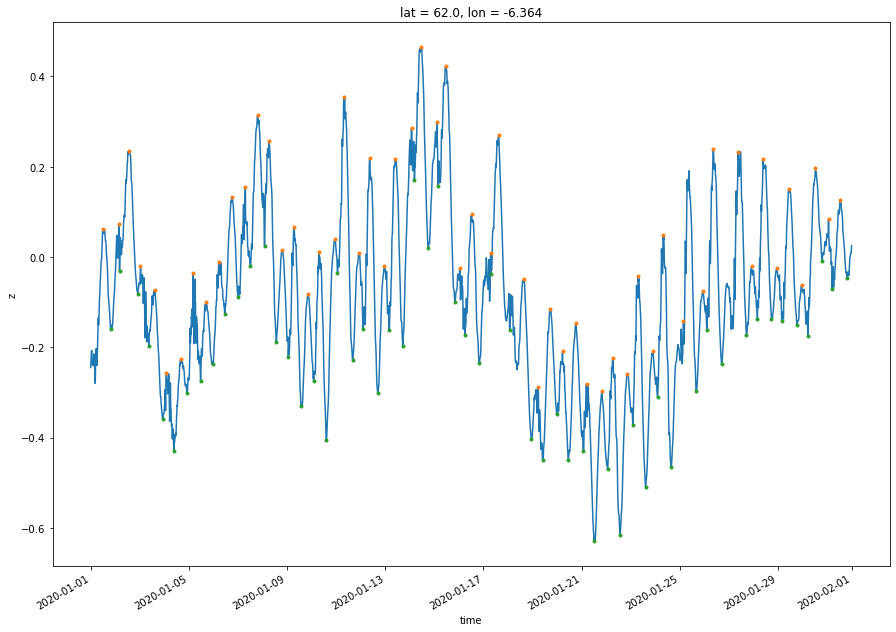

In [13]:
long = subset.lon.values[60]
lat = subset.lat.values[518]
idxp = idx_peaks_troughs.peak.sel(lon=long,lat=lat,method='nearest').values
idxt = idx_peaks_troughs.trough.sel(lon=long,lat=lat,method='nearest').values
idxp = idxp[idxp<=len(subset.time.values)].astype('int')
idxt = idxt[idxt<=len(subset.time.values)].astype('int')
print(idxt,idxp)

subset.z.sel(lon=long,lat=lat,method='nearest').plot(size=10)
plt.plot(subset.time.values[idxp],subset.z.sel(lon=long,lat=lat,method='nearest').values[idxp],'.')
plt.plot(subset.time.values[idxt],subset.z.sel(lon=long,lat=lat,method='nearest').values[idxt],'.')

[  24   77  126  179  227  279  326  376  428  476  526  576  625  678
  726  772  824  872  922  972 1023 1072 1121 1168 1219 1268 1319 1368
 1419 1466 1517 1561 1620 1667 1719 1768 1820 1868 1920 1970 2020 2069
 2118 2169 2217 2268 2314 2368 2411 2466 2511 2565 2610 2663 2708 2760
 2806 2859 2905] [   3   49  110  150  203  248  304  350  401  450  503  550  603  650
  699  748  798  848  898  949  997 1047 1094 1146 1193 1247 1293 1345
 1390 1443 1491 1546 1591 1643 1692 1742 1794 1844 1895 1944 1995 2044
 2095 2144 2194 2241 2293 2340 2392 2439 2489 2540 2587 2637 2686 2733
 2784 2832 2884 2931]
[-0.164      -0.15100001]


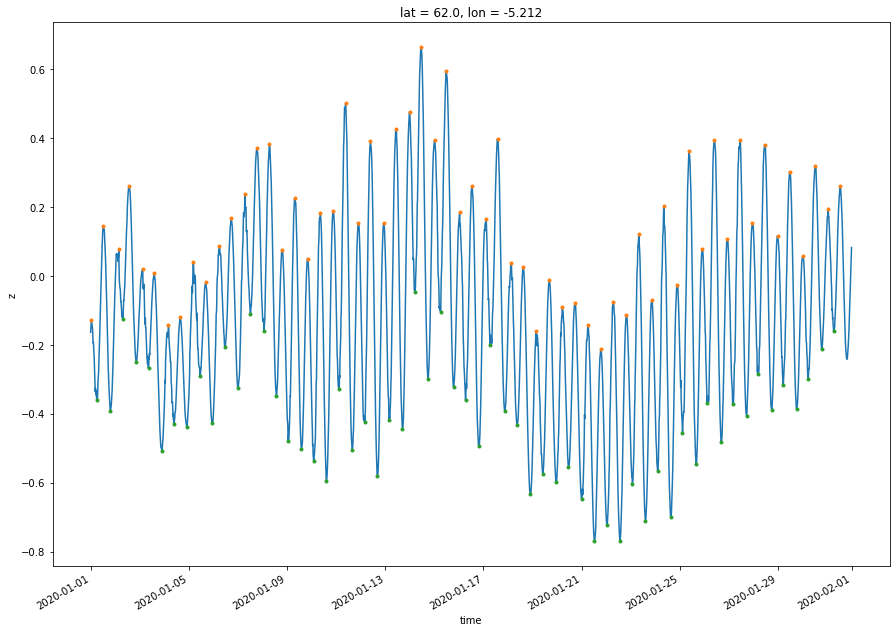

In [14]:
long = subset.lon.values[79]
lat = subset.lat.values[518]
idxp = idx_peaks_troughs.peak.sel(lon=long,lat=lat,method='nearest').values
idxt = idx_peaks_troughs.trough.sel(lon=long,lat=lat,method='nearest').values
idxp = idxp[idxp<=len(subset.time.values)].astype('int')
idxt = idxt[idxt<=len(subset.time.values)].astype('int')
print(idxt,idxp)
print(subset.z.sel(lon=long,lat=lat,method='nearest').values[0:2])


subset.z.sel(lon=long,lat=lat,method='nearest').plot(size=10)
plt.plot(subset.time.values[idxp],subset.z.sel(lon=long,lat=lat,method='nearest').values[idxp],'.')
plt.plot(subset.time.values[idxt],subset.z.sel(lon=long,lat=lat,method='nearest').values[idxt],'.')

In [4]:
start = time()
args = [subset.z.values,
        idx_peaks_troughs.peak.values,
        idx_peaks_troughs.trough.values,
        idx_peaks_troughs.p_occur.values,
        idx_peaks_troughs.t_occur.values,
        subset.lat.values,
        subset.lon.values]
range_array = R(*args)
end = time()
print(end-start)


15.00912356376648


In [5]:
range_array.shape

(60, 2, 519, 232)

In [6]:
start = time()
args = [range_array,
        subset.time.values,
        high_low.phase.values,
        idx_peaks_troughs.peak.values,
        idx_peaks_troughs.trough.values,
        idx_peaks_troughs.p_occur.values,
        idx_peaks_troughs.t_occur.values,
        subset.lat.values,
        subset.lon.values]
pd,pd_time = PD_t(*args)
write_pd(pd,pd_time,subset.lat.values,subset.lon.values,'range-pd4.nc')
end = time()
print(end-start)


395.24822449684143


In [7]:
pd = xr.open_dataset('data/processed/range-pd4.nc')

In [8]:
pd

<xarray.Dataset>
Dimensions:  (series: 2976, lat: 519, lon: 232)
Coordinates:
  * series   (series) int64 1 2 3 4 5 6 7 ... 2970 2971 2972 2973 2974 2975 2976
  * lat      (lat) float32 48.0 48.03 48.05 48.08 ... 61.92 61.95 61.97 62.0
  * lon      (lon) float32 -10.0 -9.939 -9.879 -9.818 ... 3.818 3.879 3.939 4.0
Data variables:
    pd       (series, lat, lon) float64 ...
    time     (series, lat, lon) datetime64[ns] ...

In [9]:
t = pd.time.values[:,0,0]
t = t[t>epoch]
len(t)

2931

In [10]:
power = pd.pd.values[:,0,0]
power = power[power>=0]
len(power)

2931

In [11]:
pd.time.values[0,0,0]

numpy.datetime64('2020-01-01T01:45:00.000000000')

In [12]:
pd.time.values[0,300,27]

numpy.datetime64('2020-01-01T03:30:00.000000000')

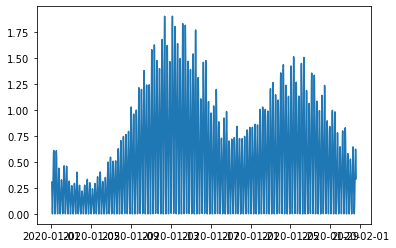

In [13]:
plt.figure()
plt.plot(t,power)

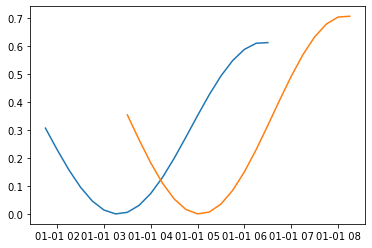

In [14]:
t1 = pd.time.values[:,300,27]
p1 = pd.pd.values[:,300,27]


plt.figure()
plt.plot(t[:20],power[:20])
plt.plot(t1[:20],p1[:20])

In [15]:
t = pd.time.values
power = pd.pd.values
latitude = pd.lat.values
longitude = pd.lon.values

In [16]:
start_time = []
end_time = []

for j, lat in enumerate(latitude):
    for k, long in enumerate(longitude):
        
        time_f = t[:,j,k]
        time_f = time_f[time_f>epoch]
        
        if len(time_f) > 0:
            
            start_time.append(time_f[0])
            end_time.append(time_f[-1])
        

In [17]:
max(start_time)

numpy.datetime64('2020-01-01T21:00:00.000000000')

In [18]:
min(end_time)

numpy.datetime64('2020-01-31T10:45:00.000000000')

In [19]:
start = np.datetime64('2020-01-02T00:00:00')
end = np.datetime64('2020-01-29T23:45:00')

indices = np.zeros((2,len(latitude),len(longitude)),dtype=int)

st = time()
for j, lat in enumerate(latitude):
    for k, long in enumerate(longitude):
        
        time_site = t[:,j,k]
        
        if time_site[0] == epoch:
            pass
        
        else:
            idx_start = [x for x, z in enumerate(time_site) if z == start][0] 
            indices[0,j,k] = idx_start
            idx_end = [x for x, z in enumerate(time_site) if z == end][0] 
            indices[1,j,k] = idx_end
            
en = time()
print(en-st)

1155.9624350070953


In [22]:
time_sync = pd.time.values[:,0,0]
time_sync = time_sync[time_sync>=start]
time_sync = time_sync[time_sync<=end]

In [23]:
indices

array([[[  89,   89,   89, ...,    0,    0,    0],
        [  89,   89,   89, ...,    0,    0,    0],
        [  89,   89,   89, ...,    0,    0,    0],
        ...,
        [  81,   81,   81, ...,   89,   89,   89],
        [  81,   81,   81, ...,   89,   89,   89],
        [  81,   81,   81, ...,   89,   89,   89]],

       [[2776, 2776, 2776, ...,    0,    0,    0],
        [2776, 2776, 2776, ...,    0,    0,    0],
        [2776, 2776, 2776, ...,    0,    0,    0],
        ...,
        [2768, 2768, 2768, ..., 2776, 2776, 2776],
        [2768, 2768, 2768, ..., 2776, 2776, 2776],
        [2768, 2768, 2768, ..., 2776, 2776, 2776]]])

In [24]:
power = pd.pd.values
power_sync = np.zeros((len(time_sync),len(latitude),len(longitude)))
power_sync[:] = np.nan

for j, lat in enumerate(latitude):
    for k, long in enumerate(longitude):
        
        if power[0,j,k] == np.nan:
            pass
        
        else:
        
            istart = indices[0,j,k]
            iend = indices[1,j,k]
        
            power_sync[:,j,k] = power[istart:iend+1,j,k]
        


In [25]:
power_sync.shape

(2688, 519, 232)

In [26]:
time_sync.shape

(2688,)

In [27]:
pd_sync = xr.Dataset({
    'pd': xr.DataArray(
        data=power_sync,
        coords={'time': time_sync,
                'lat': latitude,
                'lon': longitude},
        dims=['time','lat','lon'])})

pd_sync['pd'] = pd_sync.pd.assign_attrs(units='$Wm^{-2}$')
pd_sync['pd'] = pd_sync.pd.assign_attrs(long_name='power density')
pd_sync['lat'] = pd_sync.lat.assign_attrs(units='degrees')
pd_sync['lat'] = pd_sync.lat.assign_attrs(long_name='latitude')
pd_sync['lon'] = pd_sync.lon.assign_attrs(units='degrees')
pd_sync['lon'] = pd_sync.lon.assign_attrs(long_name='longitude')


pd_sync.to_netcdf(path=f'data/processed/range-pd-sync4.nc')

In [28]:
pd_sync = xr.open_dataset('data/processed/range-pd-sync4.nc')

In [29]:
pd_sync.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (time: 2688, lat: 519, lon: 232)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-02 ... 2020-01-29T23:45:00
  * lat      (lat) float32 48.0 48.03 48.05 48.08 ... 61.92 61.95 61.97 62.0
  * lon      (lon) float32 -10.0 -9.939 -9.879 -9.818 ... 3.818 3.879 3.939 4.0
Data variables:
    pd       (time, lat, lon) float64 ...>

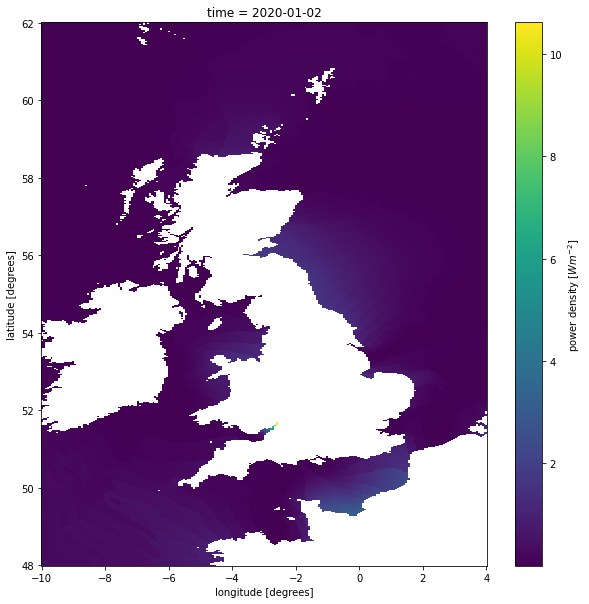

In [30]:
target_time = '2020-01-02T00:00:00.000000000'  
pd_sync.pd.sel(time=target_time,method='nearest').plot(size=10,aspect=1)  

In [20]:
uk = pd_sync.pd.sel(time=target_time,method='nearest').values
latitude = pd_sync.lat.values
longitude = pd_sync.lon.values

for j in range(len(latitude)):
    for k in range(len(longitude)):
        if np.isnan(uk[j,k]) == True:
            pass
        else:
            uk[j,k] = 0
        
        


In [22]:
for j,k in zip(range(len(error[0])),range(len(error[1]))):
    uk[error[0,j],error[1,k]] = 10

In [23]:
uk

array([[ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       [ 0.,  0.,  0., ..., nan, nan, nan],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [24]:
error_xr = xr.Dataset({
    'error': xr.DataArray(
        data=uk,
        coords={'lat': latitude,
                'lon': longitude},
        dims=['lat','lon'])})



# error_xr.to_netcdf(path=f'data/processed/range-error.nc')

In [16]:
ds = xr.open_dataset('data/processed/range-error.nc')

In [17]:
ds['lat'] = ds.lat.assign_attrs(units='degrees')
ds['lat'] = ds.lat.assign_attrs(long_name='latitude')
ds['lon'] = ds.lon.assign_attrs(units='degrees')
ds['lon'] = ds.lon.assign_attrs(long_name='longitude')

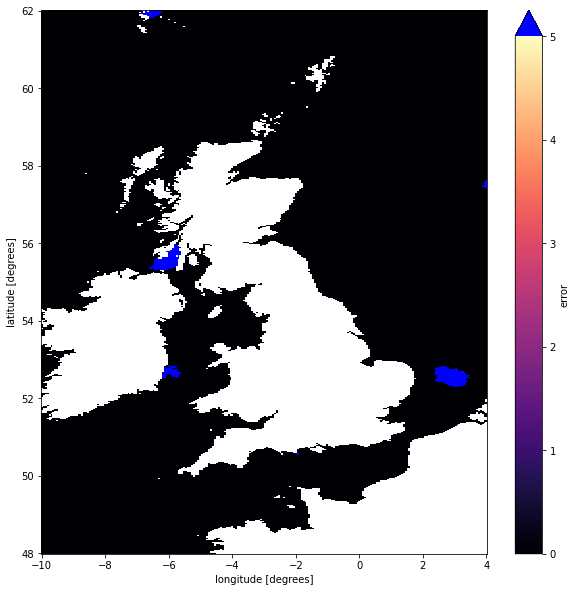

In [20]:
threshold = 5
cmap = mpl.cm.get_cmap('magma').copy()
cmap.set_over('blue')

ds.error.plot(size=10,vmax=threshold,aspect=1,cmap=cmap)  
# plt.savefig('figures/for-report/amphidromicpoints-algorithmerror.png')